In [169]:
import numpy as np
from scipy.stats import uniform, expon, pareto, cauchy, norm
import scipy.optimize as opt
import math
from matplotlib import pylab as plt
%matplotlib inline

N = 10000

# Task 1

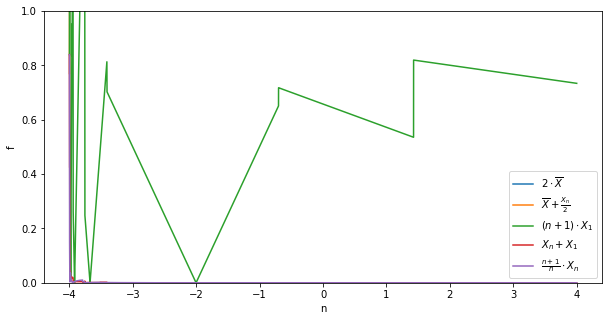

In [212]:
teta = 1
selection = uniform(scale=teta).rvs(size=N) #generate uniform distribution
n = np.linspace(1, N + 1, N) #генерирую диапазон для n
x1 = np.minimum.accumulate(selection) #первая элемент из выборки
xn = np.maximum.accumulate(selection) # последний элемент из выборки
X = np.cumsum(selection) / x #prefix sum for all 0 <= n <= 10000
estimations = [abs(2 * X - teta), abs(X + xn/2 - teta), abs((n + 1) * x1 - teta), abs(xn + x1 - teta), abs((n + 1) * xn / n - teta)] 
plt.figure(figsize=(10,5))
for estimate in estimations: #для каждой оценки строю соответствующий график
    plt.plot(x, estimate)
plt.xlabel('n')
plt.ylabel('f')
plt.legend([r"$2 \cdot \overline{X}$", r"$\overline{X} + \frac{X_n}{2}$", r"$(n + 1) \cdot X_1$", r"$X_n + X_1$", r"$\frac{n + 1}{n} \cdot X_n$"])
plt.ylim([0, 1])
plt.show()


Таким образом, из построенного графика мы видим, что оценка (n + 1) * X_1 выбивается из всех. Значит нам нужно его исключить.

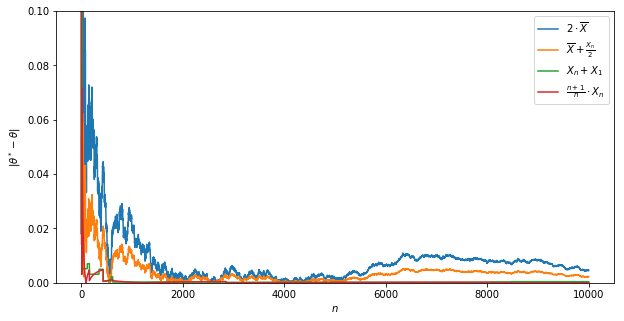

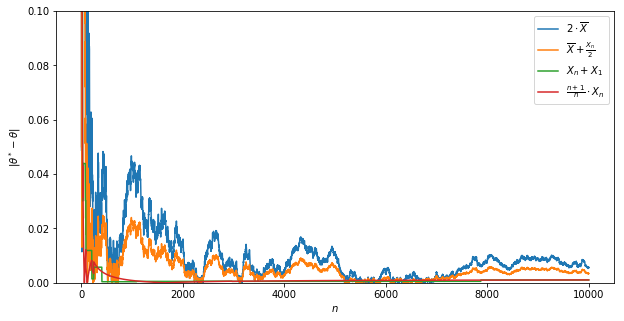

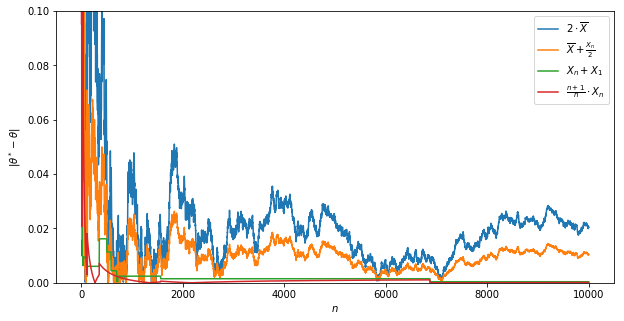

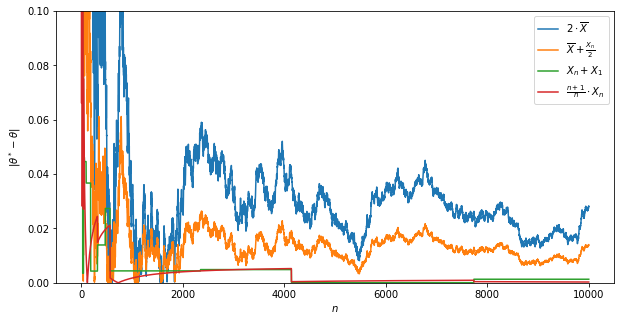

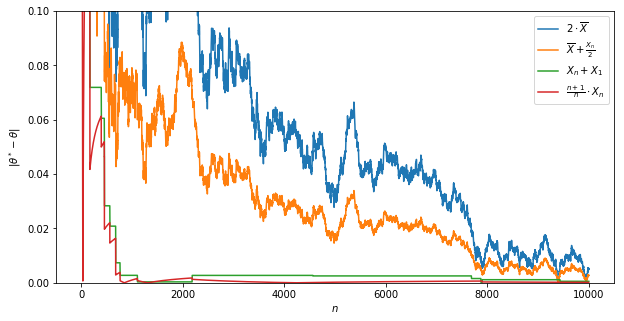

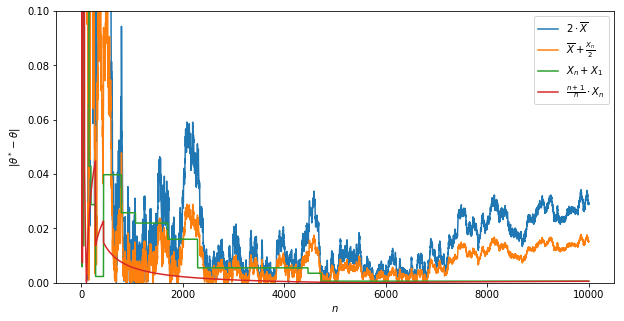

In [171]:
teta = np.linspace(1, 7, 6)
for t in teta:
    selection = uniform(scale=t).rvs(size=N)
    n = np.linspace(1, N + 1, N)
    x1 = np.minimum.accumulate(selection)
    xn = np.maximum.accumulate(selection)
    X = np.cumsum(selection) / n
    estimations = [abs(2 * X - t), abs(X + xn/2 - t), abs(xn + x1 - t),
              abs((n + 1) * xn / n - t)]
    plt.figure(figsize=(10,5))
    for estimate in estimations:
        plt.plot(n, estimate)
    plt.xlabel('$n$')
    plt.ylabel(r'$|\theta^* - \theta|$')
    plt.legend([r"$2\cdot\overline{X}$", r"$\overline{X} + \frac{X_n}{2}$", r"$X_n + X_1$", r"$\frac{n + 1}{n} \cdot X_n$"])
    plt.ylim([0, 0.1])
    plt.show()

Видно, что четвертая оценка (n + 1) * X_n / n лучше всех остальных (в смысле упомянутого модуля разности при n = N)

# Task 2

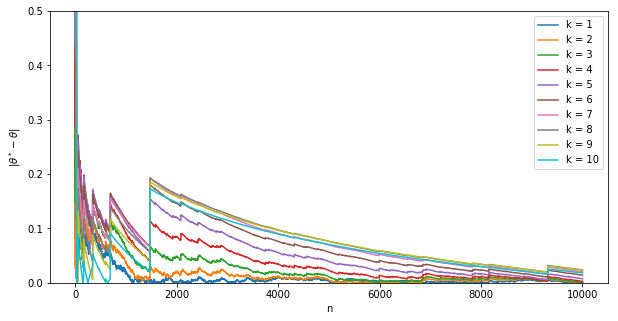

In [215]:
teta = 1
selection = expon(scale=teta).rvs(size = N)# генерирую выборку из экспоненциального распределения
k = np.arange(1, 11, 1)
n = np.linspace(1, N + 1, N)# генерирую диапазон для n
label = []
plt.figure(figsize=(10,5))
for i in k:
    teta = np.power(np.math.factorial(i) / (np.cumsum(np.power(selection, i)) / n), 1 / i)
    label.append("k = " + str(i))
    plt.plot(n, abs(teta - 1))
    plt.xlabel('n')
    plt.ylabel(r'$|\theta^* - \theta|$')
plt.legend(label)
plt.ylim([0, 0.5])
plt.show()

Видно, что самая лучшая оценка получается, когда к = 1

# Task 3

Возьмем известное распределение Парето

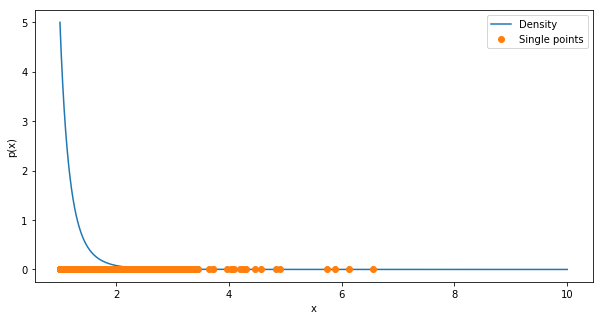

In [223]:
teta = 1
selection = pareto(b = 5).rvs(size=N)# генерирую выборку из распределения Парето
n = np.linspace(1, 10, N)
p = pareto(b = 5).pdf(n)# плотность распределения Парето
plt.figure(figsize=(10,5))
plt.plot(n, p)# строю график зависимости плотности от n 
plt.plot(selection, np.zeros(N), 'o')# а здесь наношу на этот же график точки выборки с нулевой ординатой
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(["Density", "Single points"])
plt.show()

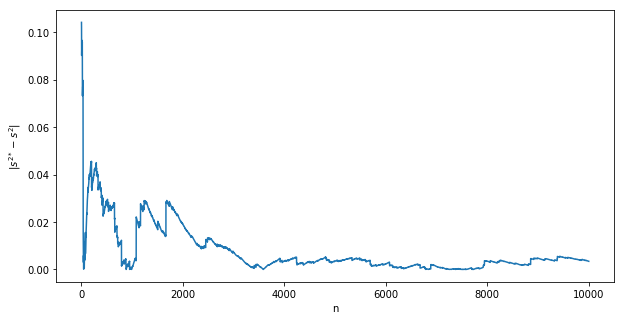

In [227]:
n = np.linspace(1, N + 1, N) # диапазон для n 
# считаю разность оценки дисперсии и ее истинного значения для каждого n
current_D = pareto(b = 5).var()
diff_s = abs(np.cumsum(selection ** 2) / n - (np.cumsum(selection) / n) ** 2 - current_D) 
plt.figure(figsize=(10,5))
plt.plot(n, diff_s)
plt.xlabel('n')
plt.ylabel(r'$|{s}^{2*} - s^2|$')
plt.show()

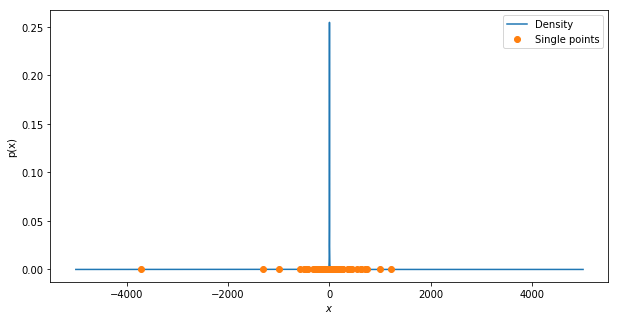

In [238]:
selection = cauchy.rvs(size=N)# генерирую выборку из распределения Коши
x = np.linspace(-N / 2, N / 2, N)
p = cauchy.pdf(x) #плотность распределения Коши
plt.figure(figsize=(10,5))
plt.plot(x, p)
plt.plot(selection, np.zeros(N), 'o')
plt.xlabel('$x$')
plt.ylabel('p(x)')
plt.legend(["Density", "Single points"])
plt.show()

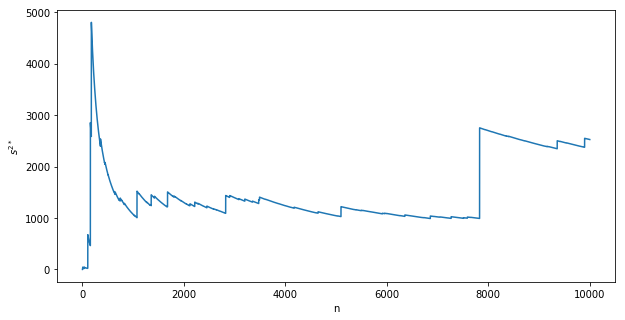

In [240]:
n = np.linspace(1, N + 1, N)# генерирую n из диапазона
s = np.cumsum(selection ** 2) / n - (np.cumsum(selection) / n) ** 2# оценка дисперсии
plt.figure(figsize=(10,5))
plt.plot(n, s)
plt.xlabel('n')
plt.ylabel(r'${s}^{2*}$')
plt.show()

# Task 4

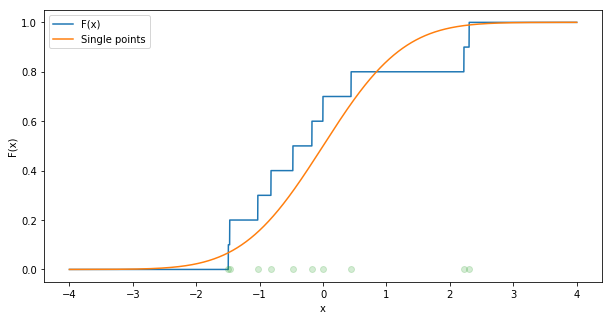

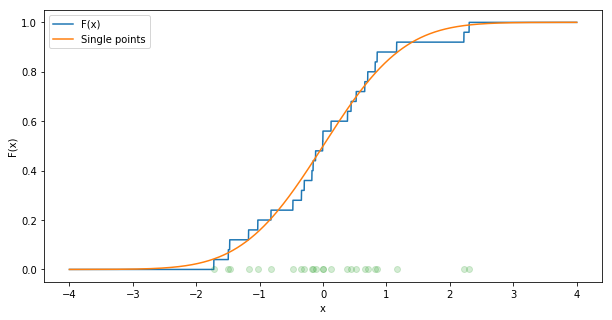

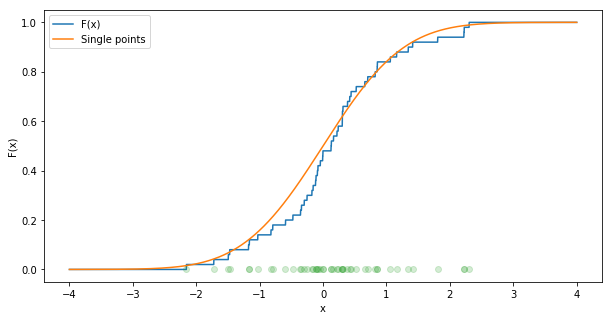

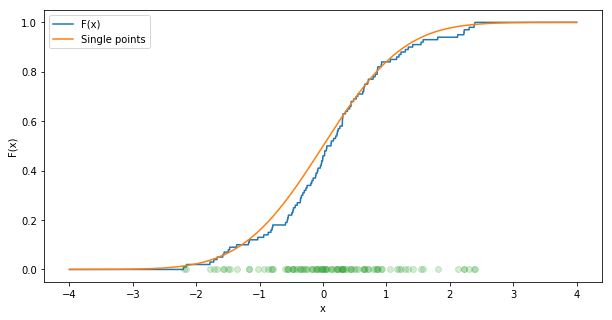

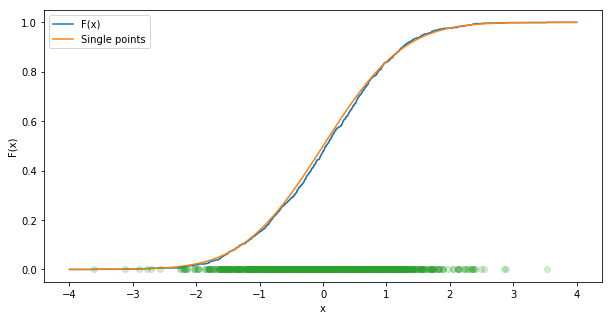

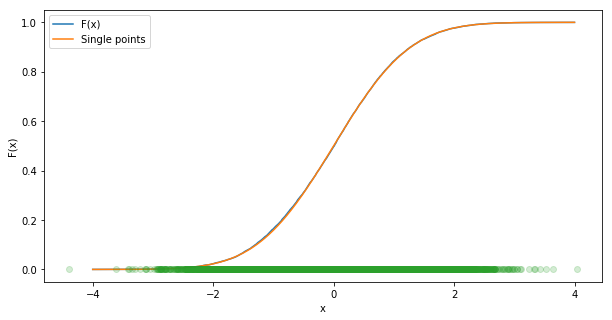

In [241]:
selection = norm.rvs(size = N) # генерирую выбору из стандартного нормального распределения
x = np.linspace(-4, 4, N)
n = np.linspace(1, N + 1, N)
F = np.array(list(map(lambda x: np.cumsum((x - selection) >= 0) / n, x))) #Эмпирическая функция распределения
n = [10, 25, 50, 100, 1000, N] #данные n
for item in n:
    plt.figure(figsize=(10,5))
    plt.plot(x, F[:, item - 1], label = "n = {} and F(x)".format(str(item)))
    plt.plot(x, norm.cdf(x))
    plt.plot(selection[:item], np.zeros(item), 'o', alpha=0.2)
    plt.xlabel('x')
    plt.ylabel("F(x)")
    plt.legend(["F(x)", "Single points"])
    plt.show()

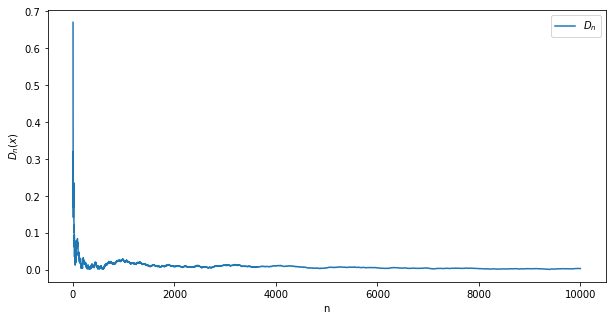

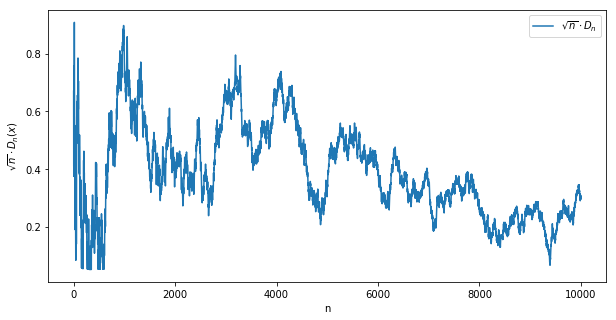

In [243]:
possible_n = np.arange(1, N + 1, 1)
# считаем D
D = -1 * np.array(list(map(lambda n: opt.fmin(lambda current_x: -abs(np.sum((current_x - selection[:n]) >= 0)/n - norm.cdf(current_x)), 0, full_output=True, disp=False)[1], possible_n)))
# считаем D_n
D_n = -1 * np.array(list(map(lambda n: np.sqrt(n) * opt.fmin(lambda x: -abs(np.sum((x - selection[:n]) >= 0)/n - norm.cdf(x)), 0, full_output=True, disp=False)[1], possible_n)))
# строим графики D_n и sqrt(n) * D_n
plt.figure(figsize=(10,5))
plt.plot(possible_n, D)
plt.xlabel('n')
plt.ylabel(r'$D_{n}(x)$')
plt.legend([r'$D_{n}$'])
plt.show()
plt.figure(figsize=(10,5))
plt.plot(possible_n, D_n)
plt.legend([r'$\sqrt{n}\cdot D_n$'])
plt.xlabel('n')
plt.ylabel(r'$\sqrt{n}\cdot D_n(x)$')   
plt.show()